<a href="https://colab.research.google.com/github/RizkiYanuar-Tech/Startup-Campus/blob/main/SC60323_Muhammad_Rizki_Yanuar_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as p
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# **Input Data**

In [ ]:
df = pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Data Preparation
  Check Missing Values

In [ ]:
df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Tidak ditemukan adanya missing value**

**Check Duplicate Data**

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021     True
1022     True
1023     True
1024     True
Length: 1025, dtype: bool

In [ ]:
df.duplicated().sum()

723

**Handle Duplicate Data**

In [ ]:
df.drop_duplicates(subset = None, keep = 'first', inplace = True)

In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
723    False
733    False
739    False
843    False
878    False
Length: 302, dtype: bool

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

**Mengecheck Outlier pada masing masing fitur**

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Check Outlier pada Fitur trestbps**

<Axes: xlabel='trestbps'>

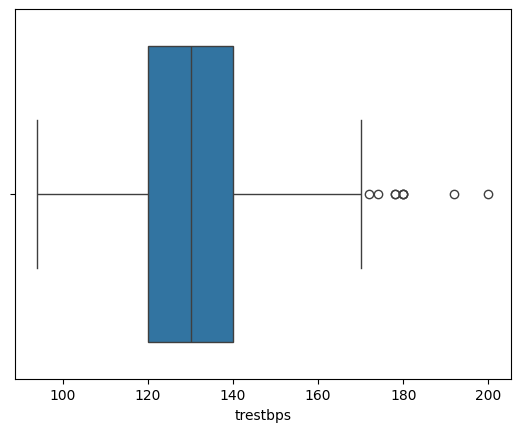

In [ ]:
#Mengecheck outlier pada fitur trestbps
#Masukkan fitur yang akan dicheck kedalam variable baru
df_outlier = df[['trestbps']]
#Panggil fungsi boxplot pada seaborn dengan masukkan data berasal dari variable tadi
sns.boxplot(data = df_outlier, x = 'trestbps')

Batas bawah:  90.0
Batas atas:  170.0


<Axes: xlabel='trestbps'>

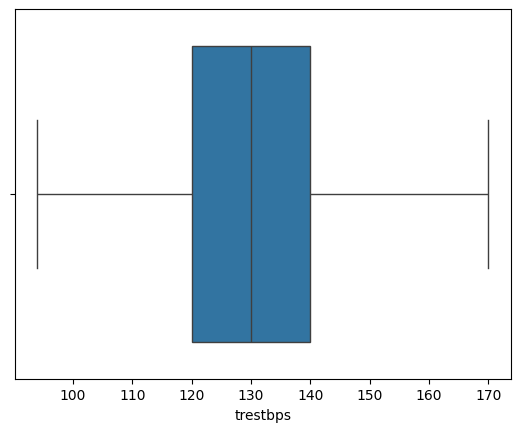

In [ ]:
# Menghitung Quartile 3 (Q3) dan Quartile 1 (Q1) dari kolom 'trestbps'
q3 = df["trestbps"].quantile(0.75)  # Quartile 3 (75th percentile)
q1 = df["trestbps"].quantile(0.25)  # Quartile 1 (25th percentile)

# Menghitung Interquartile Range (IQR)
IQR = q3 - q1

# Menghitung batas bawah dan batas atas untuk outlier detection
batas_bawah = q1 - (IQR * 1.5)  # Lower bound
batas_atas = q3 + (IQR * 1.5)    # Upper bound

print("Batas bawah: ",batas_bawah)
print("Batas atas: ",batas_atas)

# Menggunakan numpy untuk menerapkan capping pada data 'trestbps'
df["trestbps"] = np.where(df["trestbps"] > batas_atas, batas_atas,
                           np.where(df["trestbps"] < batas_bawah, batas_bawah,
                                    df["trestbps"]))

# Visualisasi boxplot setelah handling outlier
sns.boxplot(data = df_outlier, x = df["trestbps"])

**Check Outlier pada Fitur cholestrol**

<Axes: xlabel='chol'>

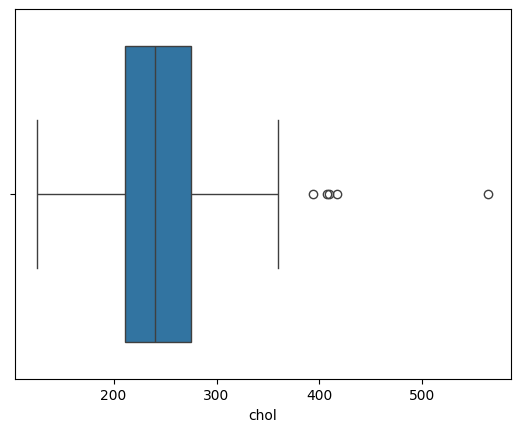

In [ ]:
#Mengecheck outlier pada fitur chol
#Masukkan fitur yang akan dicheck kedalam variable baru
df_outlier = df[['chol']]
#Panggil fungsi boxplot pada seaborn dengan masukkan data berasal dari variable tadi
sns.boxplot(data = df_outlier, x = 'chol')

Batas bawah:  115.375
Batas atas:  370.375


<Axes: xlabel='chol'>

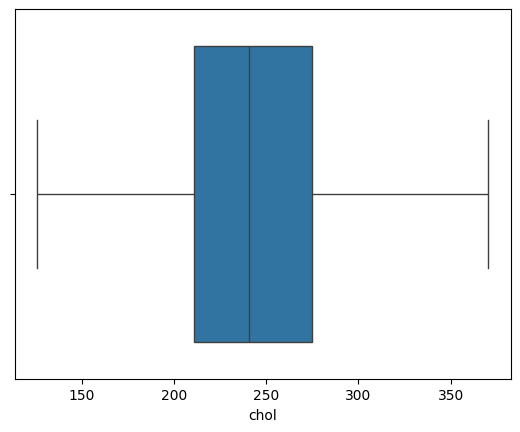

In [ ]:
# Menghitung Quartile 3 (Q3) dan Quartile 1 (Q1) dari kolom 'chol'
q3 = df["chol"].quantile(0.75)  # Quartile 3 (75th percentile)
q1 = df["chol"].quantile(0.25)  # Quartile 1 (25th percentile)

# Menghitung Interquartile Range (IQR)
IQR = q3 - q1

# Menghitung batas bawah dan batas atas untuk outlier detection
batas_bawah = q1 - (IQR * 1.5)  # Lower bound
batas_atas = q3 + (IQR * 1.5)    # Upper bound
print("Batas bawah: ",batas_bawah)
print("Batas atas: ",batas_atas)

# Menggunakan numpy untuk menerapkan capping pada data 'chol'
df["chol"] = np.where(df["chol"] > batas_atas, batas_atas,
                           np.where(df["chol"] < batas_bawah, batas_bawah,
                                   df["chol"]))

# Visualisasi boxplot setelah handling outlier
sns.boxplot(data = df_outlier, x = df["chol"])

**Check Outlier pada Fitur thalach**

<Axes: xlabel='thalach'>

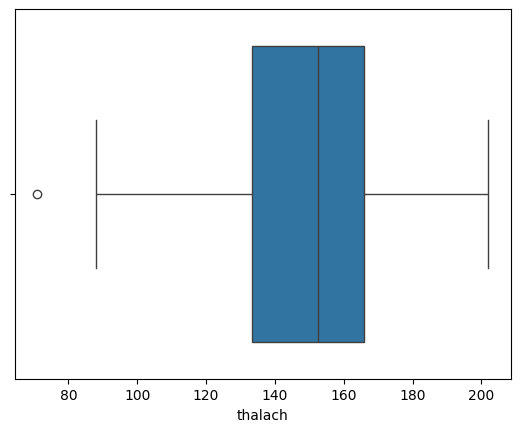

In [ ]:
#Mengecheck outlier pada fitur thalach
#Masukkan fitur yang akan dicheck kedalam variable baru
df_outlier = df[['thalach']]
#Panggil fungsi boxplot pada seaborn dengan masukkan data berasal dari variable tadi
sns.boxplot(data = df_outlier, x = 'thalach')

Batas bawah:  84.125
Batas atas:  215.125


<Axes: xlabel='thalach'>

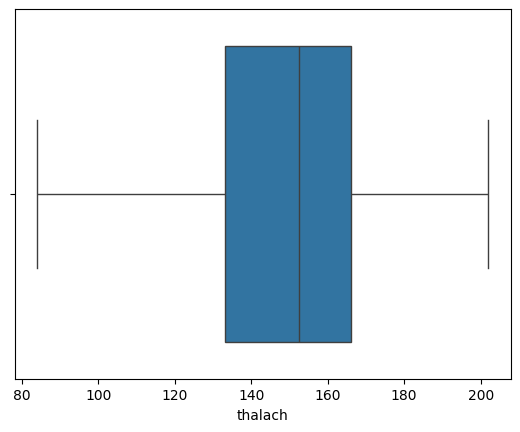

In [ ]:
# Menghitung Quartile 3 (Q3) dan Quartile 1 (Q1) dari kolom 'thalach'
q3 = df["thalach"].quantile(0.75)  # Quartile 3 (75th percentile)
q1 = df["thalach"].quantile(0.25)  # Quartile 1 (25th percentile)

# Menghitung Interquartile Range (IQR)
IQR = q3 - q1

# Menghitung batas bawah dan batas atas untuk outlier detection
batas_bawah = q1 - (IQR * 1.5)  # Lower bound
batas_atas = q3 + (IQR * 1.5)    # Upper bound
print("Batas bawah: ",batas_bawah)
print("Batas atas: ",batas_atas)

# Menggunakan numpy untuk menerapkan capping pada data 'thalach'
df["thalach"] = np.where(df["thalach"] > batas_atas, batas_atas,
                           np.where(df["thalach"] < batas_bawah, batas_bawah,
                                   df["thalach"]))

# Visualisasi boxplot setelah handling outlier
sns.boxplot(data = df_outlier, x = df["thalach"])

<Axes: xlabel='oldpeak'>

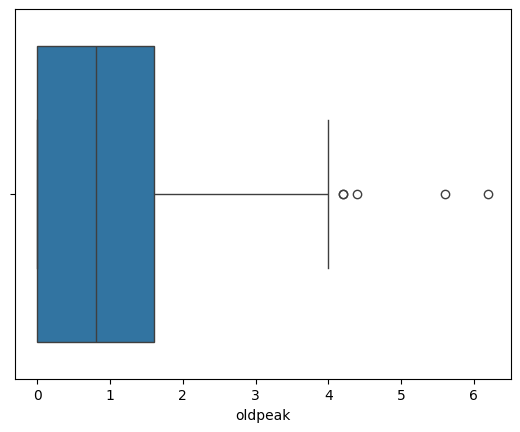

In [ ]:
#Mengecheck outlier pada fitur oldpeak
#Masukkan fitur yang akan dicheck kedalam variable baru
df_outlier = df[['oldpeak']]
#Panggil fungsi boxplot pada seaborn dengan masukkan data berasal dari variable tadi
sns.boxplot(data = df_outlier, x = 'oldpeak')

<Axes: xlabel='oldpeak'>

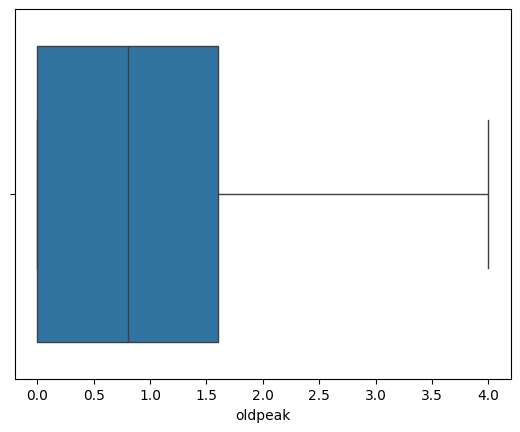

In [ ]:
# Menghitung Quartile 3 (Q3) dan Quartile 1 (Q1) dari kolom 'oldpeak'
q3 = df["oldpeak"].quantile(0.75)  # Quartile 3 (75th percentile)
q1 = df["oldpeak"].quantile(0.25)  # Quartile 1 (25th percentile)

# Menghitung Interquartile Range (IQR)
IQR = q3 - q1

# Menghitung batas bawah dan batas atas untuk outlier detection
batas_bawah = q1 - (IQR * 1.5)  # Lower bound
batas_atas = q3 + (IQR * 1.5)    # Upper bound

# Menggunakan numpy untuk menerapkan capping pada data 'oldpeak'
df["oldpeak"] = np.where(df["oldpeak"] > batas_atas, batas_atas,
                           np.where(df["oldpeak"] < batas_bawah, batas_bawah,
                                   df["oldpeak"]))

# Visualisasi boxplot setelah handling outlier
sns.boxplot(data = df_outlier, x = df["oldpeak"])

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.258278,245.377070,0.149007,0.526490,149.612997,0.327815,1.027815,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,16.605232,47.486683,0.356686,0.526027,22.765983,0.470196,1.110395,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,84.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,170.000000,370.375000,1.000000,2.000000,202.000000,1.000000,4.000000,2.000000,4.000000,3.000000,1.000000


**Imbalaced Data**

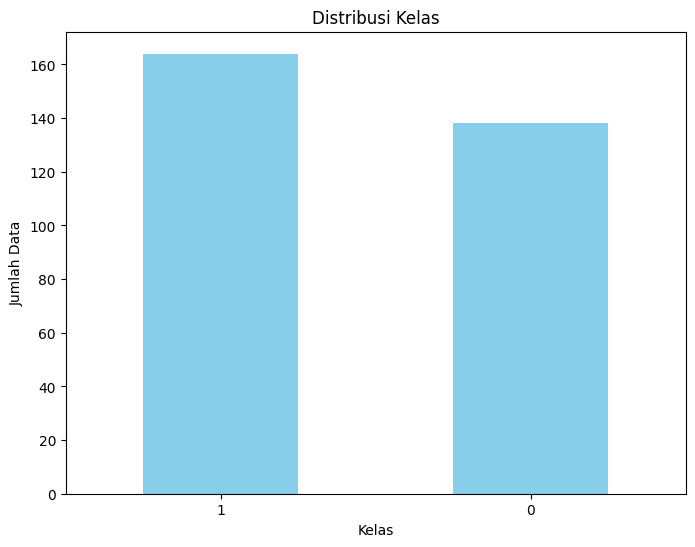

Proporsi Kelas:
 1    0.543046
0    0.456954
Name: target, dtype: float64


In [ ]:
# 1. Menghitung jumlah data pada setiap kelas
class_counts = df['target'].value_counts()

# 2. Visualisasi distribusi kelas
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Data')
plt.title('Distribusi Kelas')
plt.xticks(rotation=0)
plt.show()

class_proportions = df['target'].value_counts(normalize=True)
print("Proporsi Kelas:\n", class_proportions)

Hasil Perhitungan menunjukkan perbedaan sebesar  0,08086092 sehingga data tidak perlu dilakukan handling imbalance

**Feature Encoding**
Feature encoding tidak dilakukan lagi karena pada dataset asli, feature encoding sudah dilakukan dalam bentuk
*   One-hot encoding
*   Label Encoding



# EDA (Exploratory Data Analytics)
Mengelaborasi features dan tipe data (nominal, ordinal, numerical)

In [ ]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs           int64
restecg       int64
thalach     float64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    float64
 4   chol      302 non-null    float64
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    float64
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 35.4 KB


*   Menjelaskan kondisi dan perbedaan penggunaan mean, median, dan modus
*   Mean

    Nilai rata-rata dari semua data dalam suatu kumpulan. Dihitung dengan menjumlahkan semua nilai dan membaginya dengan jumlah data. Pada distribusi data yang skewed, mean akan tertarik ke arah ekor data yang lebih panjang. Hal ini menyebabkan mean tidak selalu mewakili nilai tengah data yang skewed.

*   Median

    Nilai tengah dari data yang telah diurutkan. Median membagi data menjadi dua bagian yang sama besar. Median tidak terpengaruh oleh outlier dan selalu berada di tengah distribusi data, regardless of skewness. Oleh karena itu, median lebih tepat digunakan untuk menggambarkan nilai tengah data yang skewed dibandingkan mean.

*   Modus

    Modus adalah nilai yang paling sering muncul dalam suatu kumpulan data. Modus menunjukkan nilai yang paling umum dalam data. Modus berguna untuk data kategorikal.Modus tidak terpengaruh oleh skewness.



**Menemukan dan mendeskripsikan statistical five summaries**

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.258278,245.377070,0.149007,0.526490,149.612997,0.327815,1.027815,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,16.605232,47.486683,0.356686,0.526027,22.765983,0.470196,1.110395,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,84.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,170.000000,370.375000,1.000000,2.000000,202.000000,1.000000,4.000000,2.000000,4.000000,3.000000,1.000000


Mendeskripsikan distribusi data

>Distribusi data on age



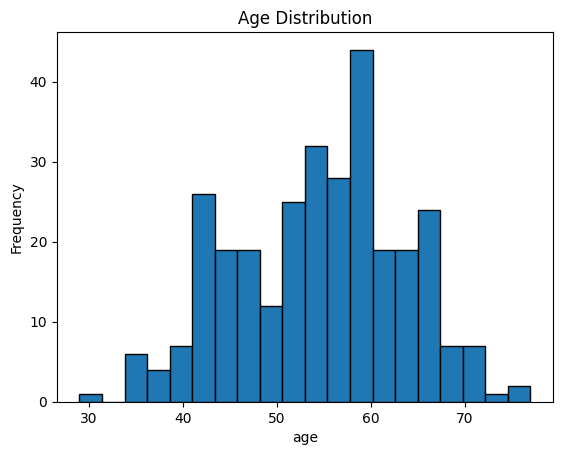

<ipython-input-84-e8f8da569122>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['age'], shade=True)


<Axes: xlabel='age', ylabel='Density'>

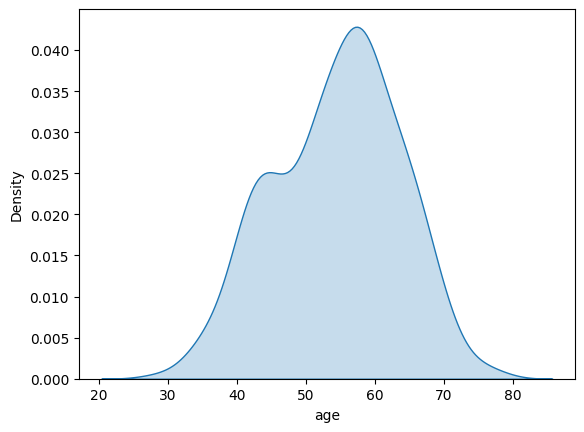

In [ ]:
plt.hist(df['age'], bins=20, edgecolor='black')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()
sns.kdeplot(df['age'], shade=True)

* untuk fitur **age** itu termasuk ke dalam ***left skew***

**Distribusi Data on Gender**
*   0 = Female
*   1 = Male

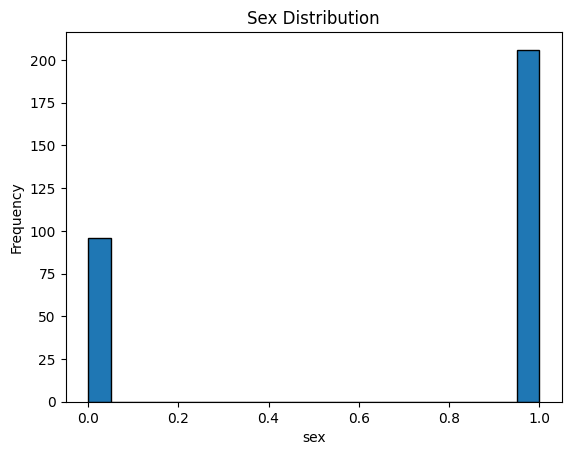

<ipython-input-85-e8d912af3fd7>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['sex'], shade=True)


<Axes: xlabel='sex', ylabel='Density'>

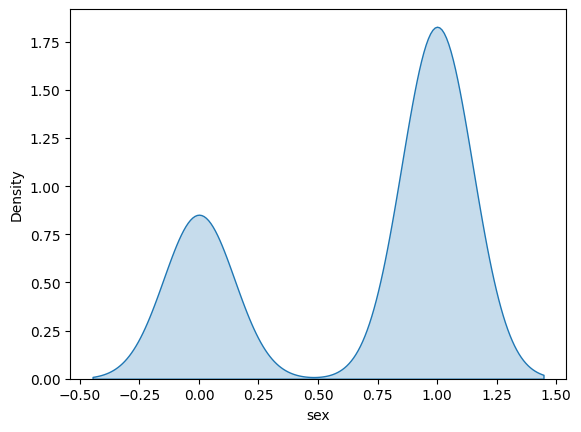

In [ ]:
plt.hist(df['sex'], bins=20, edgecolor='black')
plt.xlabel('sex')
plt.ylabel('Frequency')
plt.title('Sex Distribution')
plt.show()
sns.kdeplot(df['sex'], shade=True)

* untuk fitur **sex** itu termasuk ke dalam ***left skew***

**Distribusi Data on chest pain**
*   0 = asymptomatic (Tidak ada nyeri dada)
*   1 = typical angina (Nyeri dada tipe angina biasa)
*   2 = atypical angina (Nyeri dada tipe angina tidak stabil)
*   3 = Non-angina pain (Nyeri dada non-anginal)








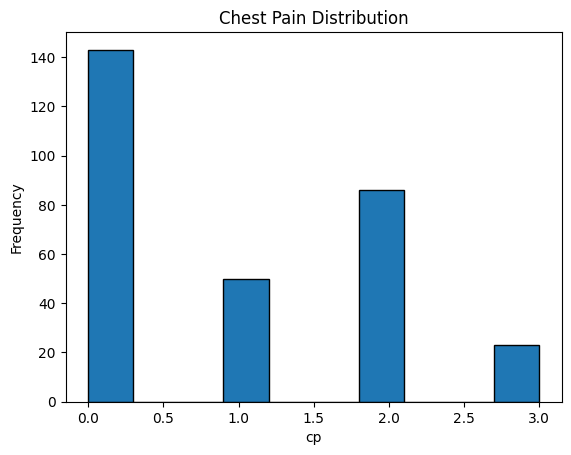

<ipython-input-86-610dc9059de9>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['cp'], shade=True)


<Axes: xlabel='cp', ylabel='Density'>

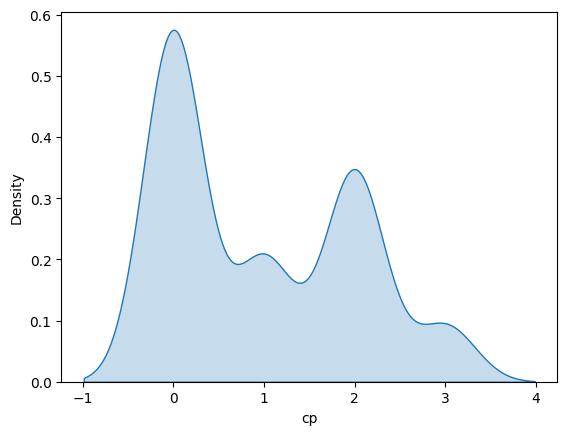

In [ ]:
plt.hist(df['cp'], edgecolor='black')
plt.xlabel('cp')
plt.ylabel('Frequency')
plt.title('Chest Pain Distribution')
plt.show()
sns.kdeplot(df['cp'], shade=True)

* untuk fitur **cp** itu termasuk ke dalam ***right skew***

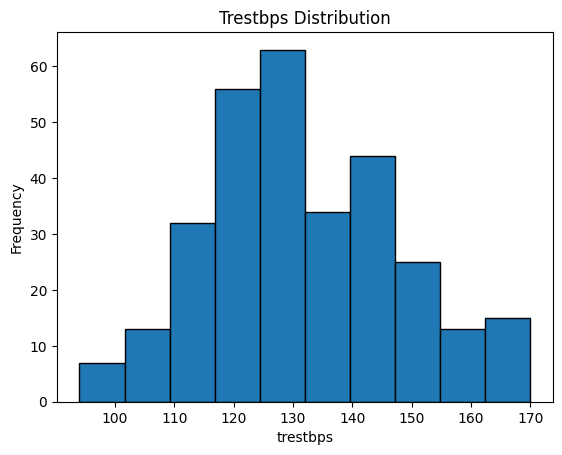

<ipython-input-87-6b6cd92b23dc>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['trestbps'], shade=True)


<Axes: xlabel='trestbps', ylabel='Density'>

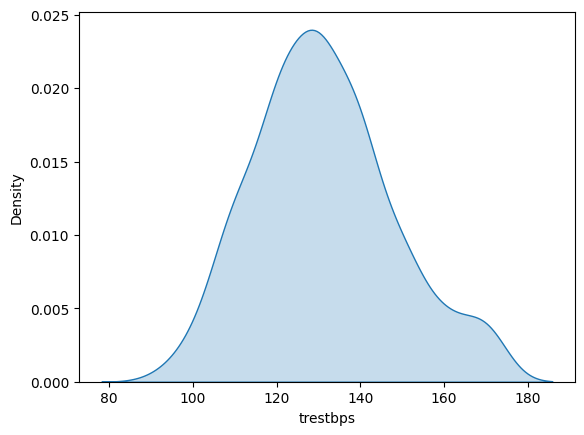

In [ ]:
plt.hist(df['trestbps'], edgecolor='black')
plt.xlabel('trestbps')
plt.ylabel('Frequency')
plt.title('Trestbps Distribution')
plt.show()
sns.kdeplot(df['trestbps'], shade=True)

* untuk fitur **trestbps** itu termasuk ke dalam ***right skew***

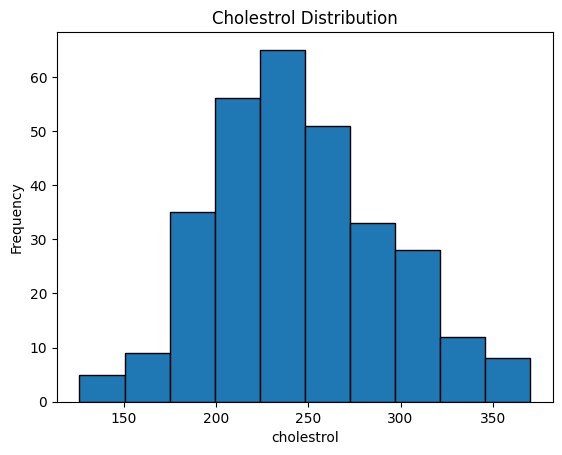

<ipython-input-88-300e8570bca6>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['chol'], shade=True)


<Axes: xlabel='chol', ylabel='Density'>

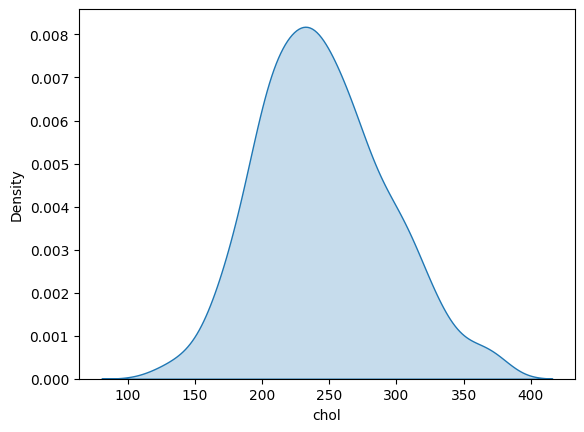

In [ ]:
plt.hist(df['chol'], edgecolor='black')
plt.xlabel('cholestrol')
plt.ylabel('Frequency')
plt.title('Cholestrol Distribution')
plt.show()
sns.kdeplot(df['chol'], shade=True)

* untuk fitur **chol** itu termasuk ke dalam ***right skew***

**fasting blood sugar**
*   1 = True
*   0 = False

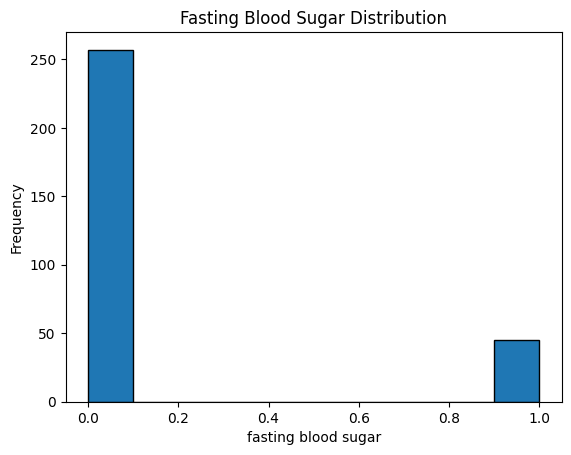

<ipython-input-89-1d768b818e67>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['fbs'], shade=True)


<Axes: xlabel='fbs', ylabel='Density'>

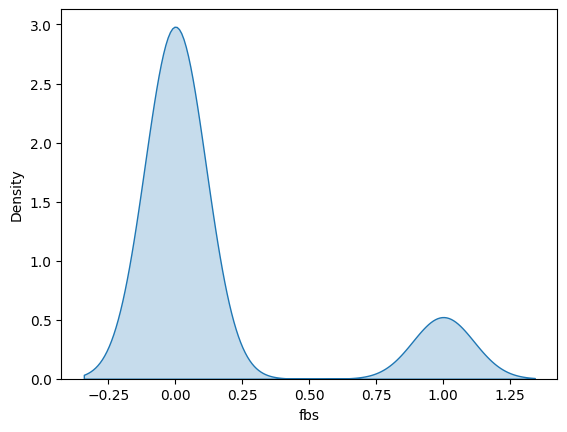

In [ ]:
plt.hist(df['fbs'], edgecolor='black')
plt.xlabel('fasting blood sugar')
plt.ylabel('Frequency')
plt.title('Fasting Blood Sugar Distribution')
plt.show()
sns.kdeplot(df['fbs'], shade=True)

* untuk fitur **fbs** itu termasuk ke dalam ***right skew***

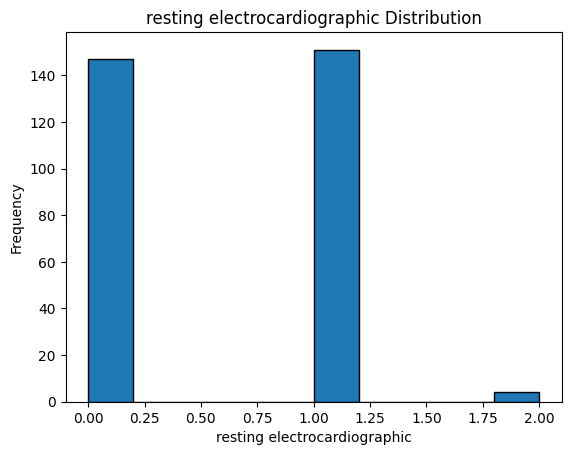

<ipython-input-90-fc426cb7d176>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['restecg'], shade=True)


<Axes: xlabel='restecg', ylabel='Density'>

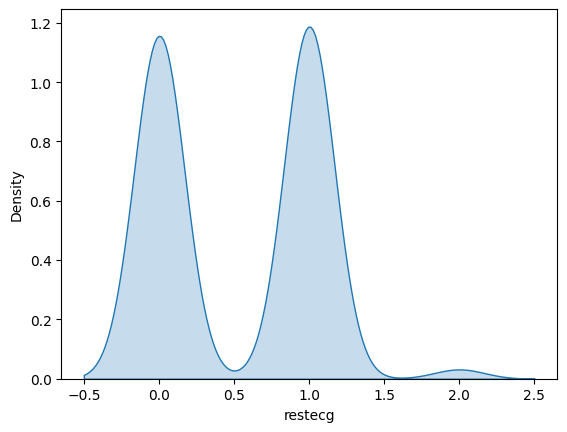

In [ ]:
plt.hist(df['restecg'], edgecolor='black')
plt.xlabel('resting electrocardiographic')
plt.ylabel('Frequency')
plt.title('resting electrocardiographic Distribution')
plt.show()
sns.kdeplot(df['restecg'], shade=True)

* untuk fitur **restecg** itu termasuk ke dalam ***right skew***

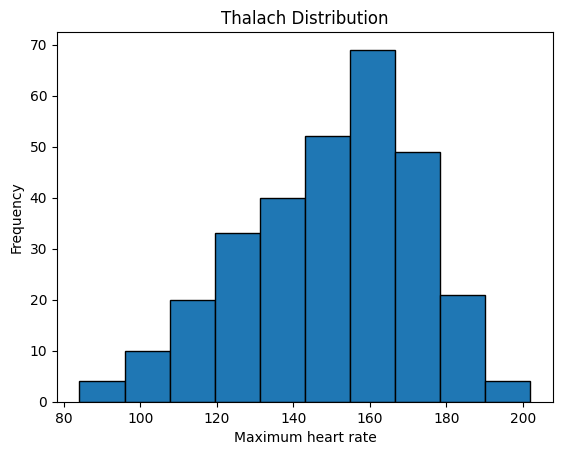

<ipython-input-91-65db49ae6307>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['thalach'], shade=True)


<Axes: xlabel='thalach', ylabel='Density'>

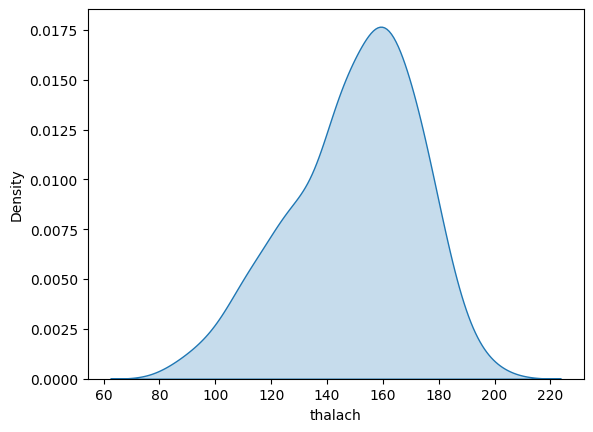

In [ ]:
plt.hist(df['thalach'], edgecolor='black')
plt.xlabel('Maximum heart rate')
plt.ylabel('Frequency')
plt.title('Thalach Distribution')
plt.show()
sns.kdeplot(df['thalach'], shade=True)

* untuk fitur **thalach** itu termasuk ke dalam ***left skew***

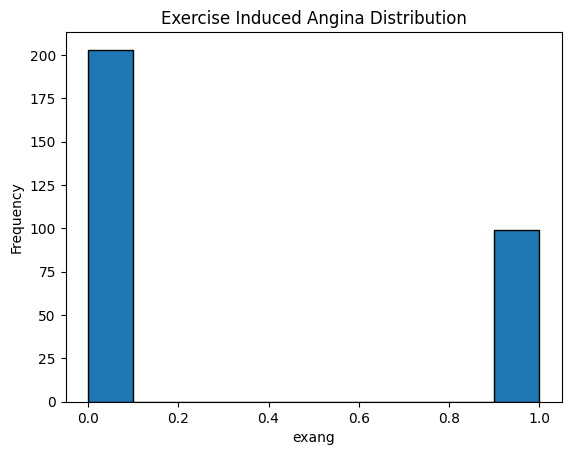

<ipython-input-92-7c53237cd4c9>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['exang'], shade=True)


<Axes: xlabel='exang', ylabel='Density'>

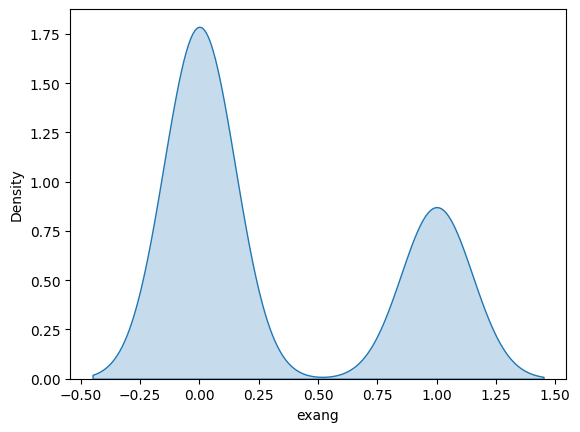

In [ ]:
plt.hist(df['exang'], edgecolor='black')
plt.xlabel('exang')
plt.ylabel('Frequency')
plt.title('Exercise Induced Angina Distribution')
plt.show()
sns.kdeplot(df['exang'], shade=True)


* untuk fitur **exang** itu termasuk ke dalam ***right skew***

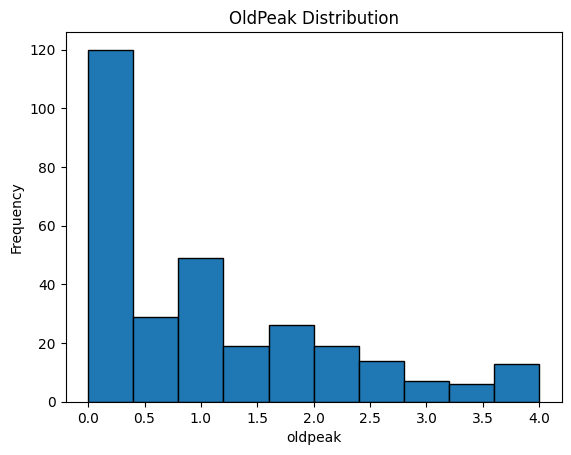

<ipython-input-93-2992b261116b>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['oldpeak'], shade=True)


<Axes: xlabel='oldpeak', ylabel='Density'>

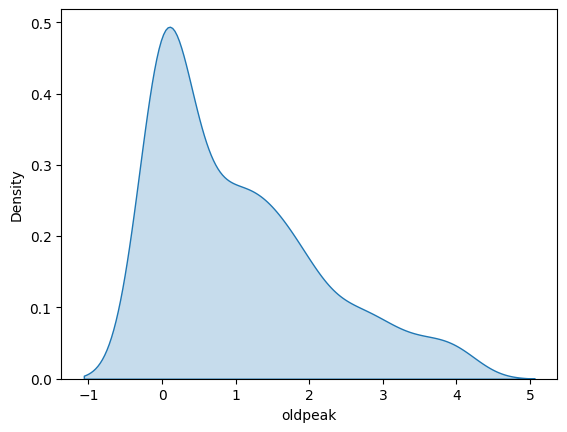

In [ ]:
plt.hist(df['oldpeak'], edgecolor='black')
plt.xlabel('oldpeak')
plt.ylabel('Frequency')
plt.title('OldPeak Distribution')
plt.show()
sns.kdeplot(df['oldpeak'], shade=True)


* untuk fitur **oldpeak** itu termasuk ke dalam ***right skew***

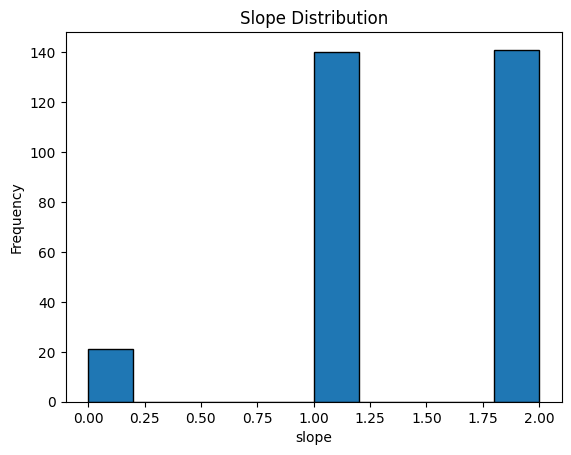

<ipython-input-94-9b7058e17a91>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['slope'], shade=True)


<Axes: xlabel='slope', ylabel='Density'>

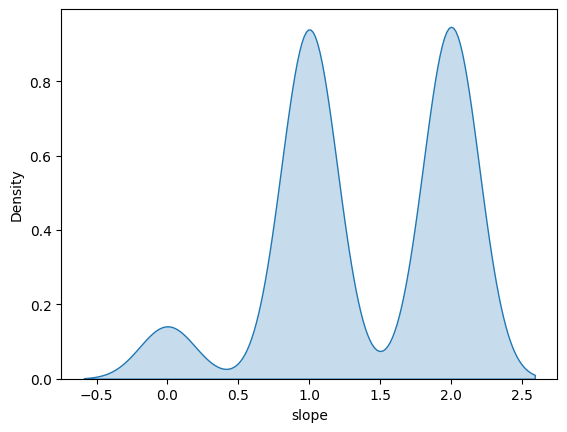

In [ ]:
plt.hist(df['slope'], edgecolor='black')
plt.xlabel('slope')
plt.ylabel('Frequency')
plt.title('Slope Distribution')
plt.show()
sns.kdeplot(df['slope'], shade=True)


* untuk fitur **slope** itu termasuk ke dalam ***left skew***

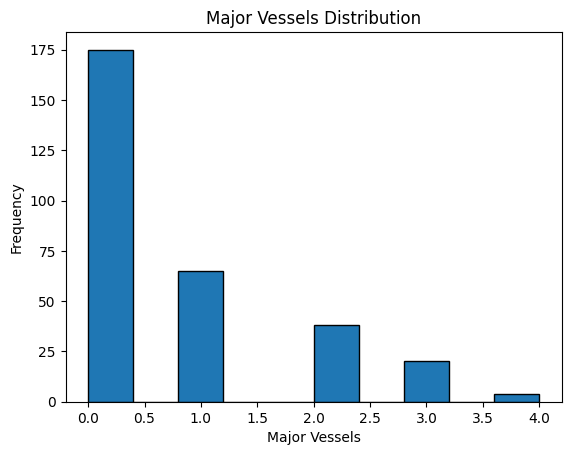

<ipython-input-95-dafe459577a8>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['ca'], shade=True)


<Axes: xlabel='ca', ylabel='Density'>

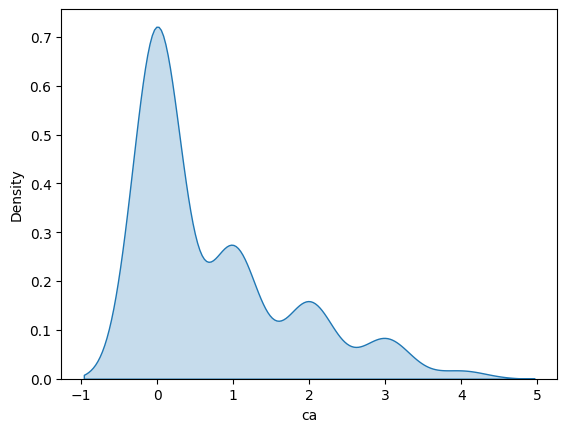

In [ ]:
plt.hist(df['ca'], edgecolor='black')
plt.xlabel('Major Vessels')
plt.ylabel('Frequency')
plt.title('Major Vessels Distribution')
plt.show()
sns.kdeplot(df['ca'], shade=True)



* untuk fitur **ca** itu termasuk ke dalam ***right skew***

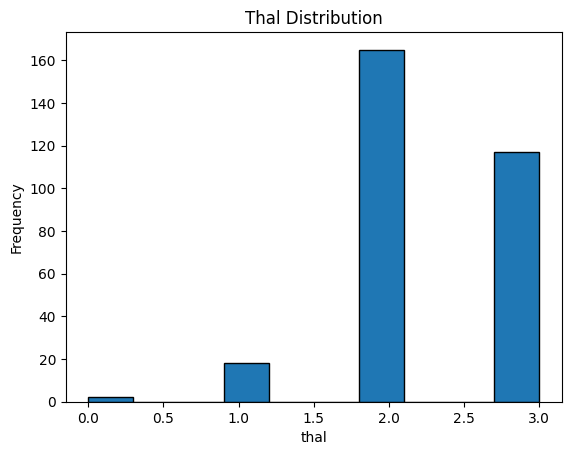

<ipython-input-96-4c3e7b68c445>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['thal'], shade=True)


<Axes: xlabel='thal', ylabel='Density'>

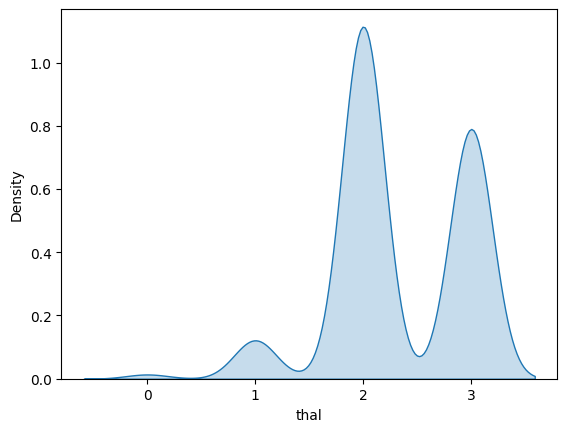

In [ ]:
plt.hist(df['thal'], edgecolor='black')
plt.xlabel('thal')
plt.ylabel('Frequency')
plt.title('Thal Distribution')
plt.show()
sns.kdeplot(df['thal'], shade=True)



* untuk fitur **thal** itu termasuk ke dalam ***left skew***

# Feature Engineering

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125.0,212.0,0,1,168.0,0,1.0,2,2,3,0
1,53,1,0,140.0,203.0,1,0,155.0,1,3.1,0,0,3,0
2,70,1,0,145.0,174.0,0,1,125.0,1,2.6,0,0,3,0
3,61,1,0,148.0,203.0,0,1,161.0,0,0.0,2,1,3,0
4,62,0,0,138.0,294.0,1,1,106.0,0,1.9,1,3,2,0


In [ ]:
rata_tekanan_darah = (df['trestbps'] + df['oldpeak']) / 2

In [ ]:
df['Mean Blood Pressure'] = rata_tekanan_darah
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Mean Blood Pressure
0,52,1,0,125.0,212.0,0,1,168.0,0,1.0,2,2,3,0,63.00
1,53,1,0,140.0,203.0,1,0,155.0,1,3.1,0,0,3,0,71.55
2,70,1,0,145.0,174.0,0,1,125.0,1,2.6,0,0,3,0,73.80
3,61,1,0,148.0,203.0,0,1,161.0,0,0.0,2,1,3,0,74.00
4,62,0,0,138.0,294.0,1,1,106.0,0,1.9,1,3,2,0,69.95


**Menambahkan Fitur Status Cholestrol**

In [ ]:
df.loc[(df['age'] >= 29) & (df['chol'] < 200.0), "Status Cholestrol"] = "Normal"
df.loc[(df['age'] >= 29) & (df['chol'] > 200.0) & (df['chol'] <= 239.0), "Status Cholestrol"] = "Diatas batas normal"
df.loc[(df['age'] >= 29) & (df['chol'] >= 240.0), "Status Cholestrol"] = "Tinggi"

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Mean Blood Pressure,Status Cholestrol
0,52,1,0,125.0,212.0,0,1,168.0,0,1.0,2,2,3,0,63.00,Diatas batas normal
1,53,1,0,140.0,203.0,1,0,155.0,1,3.1,0,0,3,0,71.55,Diatas batas normal
2,70,1,0,145.0,174.0,0,1,125.0,1,2.6,0,0,3,0,73.80,Normal
3,61,1,0,148.0,203.0,0,1,161.0,0,0.0,2,1,3,0,74.00,Diatas batas normal
4,62,0,0,138.0,294.0,1,1,106.0,0,1.9,1,3,2,0,69.95,Tinggi


**Fitur Ratio antara cholestrol dan tekanan darah**

In [ ]:
ratio_chol_trestbps = df['chol'] / df['trestbps']
df['ratio chol trestbps'] = ratio_chol_trestbps

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Mean Blood Pressure,Status Cholestrol,ratio chol trestbps
0,52,1,0,125.0,212.0,0,1,168.0,0,1.0,2,2,3,0,63.00,Diatas batas normal,1.696000
1,53,1,0,140.0,203.0,1,0,155.0,1,3.1,0,0,3,0,71.55,Diatas batas normal,1.450000
2,70,1,0,145.0,174.0,0,1,125.0,1,2.6,0,0,3,0,73.80,Normal,1.200000
3,61,1,0,148.0,203.0,0,1,161.0,0,0.0,2,1,3,0,74.00,Diatas batas normal,1.371622
4,62,0,0,138.0,294.0,1,1,106.0,0,1.9,1,3,2,0,69.95,Tinggi,2.130435


**Fitur Category terhadap kemungkinan terkena Kardiovaskular berdasarkan ratio cholestrol dan tekanan darah**

In [ ]:
df.loc[df['ratio chol trestbps'] < 4.0, "category ratio"] = "Resiko Rendah Penyakit Kardiovaskular"
df.loc[(df['ratio chol trestbps'] >= 4.0) & (df['ratio chol trestbps'] <= 5.0), "category ratio"] = "Resiko Menengah Penyakit Kardiovaskular"
df.loc[(df['ratio chol trestbps'] > 5.0) , "category ratio"] = "Resiko Tinggi Penyakit Kardiovaskular"

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Mean Blood Pressure,Status Cholestrol,ratio chol trestbps,category ratio
0,52,1,0,125.0,212.0,0,1,168.0,0,1.0,2,2,3,0,63.00,Diatas batas normal,1.696000,Resiko Rendah Penyakit Kardiovaskular
1,53,1,0,140.0,203.0,1,0,155.0,1,3.1,0,0,3,0,71.55,Diatas batas normal,1.450000,Resiko Rendah Penyakit Kardiovaskular
2,70,1,0,145.0,174.0,0,1,125.0,1,2.6,0,0,3,0,73.80,Normal,1.200000,Resiko Rendah Penyakit Kardiovaskular
3,61,1,0,148.0,203.0,0,1,161.0,0,0.0,2,1,3,0,74.00,Diatas batas normal,1.371622,Resiko Rendah Penyakit Kardiovaskular
4,62,0,0,138.0,294.0,1,1,106.0,0,1.9,1,3,2,0,69.95,Tinggi,2.130435,Resiko Rendah Penyakit Kardiovaskular


**Fitur Category terhadap Usia**

In [ ]:
#Menambah Kategori Usia
usia = df['age']

df.loc[(usia < 35 ), "Kategori Usia"] = "Muda"
df.loc[(usia >= 35) & (usia <= 55), "Kategori Usia"] = "Dewasa"
df.loc[(usia >= 55) , "Kategori Usia"] = "Lanjut Usia"

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Mean Blood Pressure,Status Cholestrol,ratio chol trestbps,category ratio,Kategori Usia
0,52,1,0,125.0,212.0,0,1,168.0,0,1.0,2,2,3,0,63.00,Diatas batas normal,1.696000,Resiko Rendah Penyakit Kardiovaskular,Dewasa
1,53,1,0,140.0,203.0,1,0,155.0,1,3.1,0,0,3,0,71.55,Diatas batas normal,1.450000,Resiko Rendah Penyakit Kardiovaskular,Dewasa
2,70,1,0,145.0,174.0,0,1,125.0,1,2.6,0,0,3,0,73.80,Normal,1.200000,Resiko Rendah Penyakit Kardiovaskular,Lanjut Usia
3,61,1,0,148.0,203.0,0,1,161.0,0,0.0,2,1,3,0,74.00,Diatas batas normal,1.371622,Resiko Rendah Penyakit Kardiovaskular,Lanjut Usia
4,62,0,0,138.0,294.0,1,1,106.0,0,1.9,1,3,2,0,69.95,Tinggi,2.130435,Resiko Rendah Penyakit Kardiovaskular,Lanjut Usia


**Menambahkan fitur Hyperglycemia berdasarkan fasting blood sugar**
dimana jika gula darah > 120 mg/dl maka kemungkinan terjadi Hyperglycemia yang bisa menyebabkan penyakit jantung kardiovaskular

In [ ]:
Hyperglycemia = df['fbs']

df.loc[(Hyperglycemia == 1 ), "Hyperglycemia"] = "YA"
df.loc[(Hyperglycemia == 0), "Hyperglycemia"] = "TIDAK"

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Mean Blood Pressure,Status Cholestrol,ratio chol trestbps,category ratio,Kategori Usia,Hyperglycemia
0,52,1,0,125.0,212.0,0,1,168.0,0,1.0,2,2,3,0,63.00,Diatas batas normal,1.696000,Resiko Rendah Penyakit Kardiovaskular,Dewasa,TIDAK
1,53,1,0,140.0,203.0,1,0,155.0,1,3.1,0,0,3,0,71.55,Diatas batas normal,1.450000,Resiko Rendah Penyakit Kardiovaskular,Dewasa,YA
2,70,1,0,145.0,174.0,0,1,125.0,1,2.6,0,0,3,0,73.80,Normal,1.200000,Resiko Rendah Penyakit Kardiovaskular,Lanjut Usia,TIDAK
3,61,1,0,148.0,203.0,0,1,161.0,0,0.0,2,1,3,0,74.00,Diatas batas normal,1.371622,Resiko Rendah Penyakit Kardiovaskular,Lanjut Usia,TIDAK
4,62,0,0,138.0,294.0,1,1,106.0,0,1.9,1,3,2,0,69.95,Tinggi,2.130435,Resiko Rendah Penyakit Kardiovaskular,Lanjut Usia,YA


**Menambahkan fitur kategori terhadap tekanan darah** jika tekanan darah tinggi ataupun rendah bisa menyebabkan terjadi nya penyakit jantung

In [ ]:
restbps = df['trestbps']

df.loc[(restbps > 120 ), "Kategori Tekanan Darah"] = "Hipertensi"
df.loc[(restbps < 120), "Kategori Tekanan Darah"] = "Normal"
df.loc[(restbps < 90 ), "Kategori Tekanan Darah"] = "Hipotensi"

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,ca,thal,target,Mean Blood Pressure,Status Cholestrol,ratio chol trestbps,category ratio,Kategori Usia,Hyperglycemia,Kategori Tekanan Darah
0,52,1,0,125.0,212.0,0,1,168.0,0,1.0,...,2,3,0,63.00,Diatas batas normal,1.696000,Resiko Rendah Penyakit Kardiovaskular,Dewasa,TIDAK,Hipertensi
1,53,1,0,140.0,203.0,1,0,155.0,1,3.1,...,0,3,0,71.55,Diatas batas normal,1.450000,Resiko Rendah Penyakit Kardiovaskular,Dewasa,YA,Hipertensi
2,70,1,0,145.0,174.0,0,1,125.0,1,2.6,...,0,3,0,73.80,Normal,1.200000,Resiko Rendah Penyakit Kardiovaskular,Lanjut Usia,TIDAK,Hipertensi
3,61,1,0,148.0,203.0,0,1,161.0,0,0.0,...,1,3,0,74.00,Diatas batas normal,1.371622,Resiko Rendah Penyakit Kardiovaskular,Lanjut Usia,TIDAK,Hipertensi
4,62,0,0,138.0,294.0,1,1,106.0,0,1.9,...,3,2,0,69.95,Tinggi,2.130435,Resiko Rendah Penyakit Kardiovaskular,Lanjut Usia,YA,Hipertensi


Menambahkan Kategori adanya gejala angina atau tidak, dimana Angina adalah kondisi di mana seseorang mengalami nyeri dada atau ketidaknyamanan di dada yang disebabkan oleh aktivitas fisik atau latihan.

In [ ]:
#Membuat kategori bergejala angina atau tidak
angina = df['exang']

df.loc[(angina == 0 ), "Angina"] = "Tidak Bergejala"
df.loc[(angina == 1), "Angina"] = "Bergejala"

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal,target,Mean Blood Pressure,Status Cholestrol,ratio chol trestbps,category ratio,Kategori Usia,Hyperglycemia,Kategori Tekanan Darah,Angina
0,52,1,0,125.0,212.0,0,1,168.0,0,1.0,...,3,0,63.00,Diatas batas normal,1.696000,Resiko Rendah Penyakit Kardiovaskular,Dewasa,TIDAK,Hipertensi,Tidak Bergejala
1,53,1,0,140.0,203.0,1,0,155.0,1,3.1,...,3,0,71.55,Diatas batas normal,1.450000,Resiko Rendah Penyakit Kardiovaskular,Dewasa,YA,Hipertensi,Bergejala
2,70,1,0,145.0,174.0,0,1,125.0,1,2.6,...,3,0,73.80,Normal,1.200000,Resiko Rendah Penyakit Kardiovaskular,Lanjut Usia,TIDAK,Hipertensi,Bergejala
3,61,1,0,148.0,203.0,0,1,161.0,0,0.0,...,3,0,74.00,Diatas batas normal,1.371622,Resiko Rendah Penyakit Kardiovaskular,Lanjut Usia,TIDAK,Hipertensi,Tidak Bergejala
4,62,0,0,138.0,294.0,1,1,106.0,0,1.9,...,2,0,69.95,Tinggi,2.130435,Resiko Rendah Penyakit Kardiovaskular,Lanjut Usia,YA,Hipertensi,Tidak Bergejala


**Menambahkan hasil dari major vessel**
Jika:

*   0 pembuluh darah terwarnai pada fluoroskopi, memungkinkan terjadi penyumbatan total pada semua pembuluh darah koroner

*   1 pembuluh darah terwarnai pada fluoroskopi, memungkinkan terjadinya penyempitan pada arteri koroner

*   2 pembuluh darah terwarnai pada fluoroskop, menggambarkan anatomi normal

*   3 pembuluh darah terwarnai pada fluoroskopi, memungkinkan terjadinya masalah kelainan jantung bawaan ataupun penyumbatan pada arteri pulmonalis

*   4 pembuluh darah terwarnai pada fluoroskopi, memungkinkan terjadinya masalah jantung yang serius seperti, Truncus arteriosus (Kelainan ini terjadi ketika satu pembuluh darah besar keluar dari jantung)



In [ ]:
categori_major_vessels = df['ca']

df.loc[(categori_major_vessels == 0 ), "Kategori Pembuluh Darah"] = "Tidak ada pembuluh darah yang terwarnai Fluoroskopi"
df.loc[(categori_major_vessels == 1), "Kategori Pembuluh Darah"] = "1 pembuluh darah terwarnai Fluoroskopi"
df.loc[(categori_major_vessels == 2 ), "Kategori Pembuluh Darah"] = "2 pembuluh darah terwarnai Fluoroskopi"
df.loc[(categori_major_vessels == 3), "Kategori Pembuluh Darah"] = "3 pembuluh darah terwarnai Fluoroskopi"
df.loc[(categori_major_vessels == 4), "Kategori Pembuluh Darah"] = "4 pembuluh darah terwarnai Fluoroskopi"

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,target,Mean Blood Pressure,Status Cholestrol,ratio chol trestbps,category ratio,Kategori Usia,Hyperglycemia,Kategori Tekanan Darah,Angina,Kategori Pembuluh Darah
0,52,1,0,125.0,212.0,0,1,168.0,0,1.0,...,0,63.00,Diatas batas normal,1.696000,Resiko Rendah Penyakit Kardiovaskular,Dewasa,TIDAK,Hipertensi,Tidak Bergejala,2 pembuluh darah terwarnai Fluoroskopi
1,53,1,0,140.0,203.0,1,0,155.0,1,3.1,...,0,71.55,Diatas batas normal,1.450000,Resiko Rendah Penyakit Kardiovaskular,Dewasa,YA,Hipertensi,Bergejala,Tidak ada pembuluh darah yang terwarnai Fluoro...
2,70,1,0,145.0,174.0,0,1,125.0,1,2.6,...,0,73.80,Normal,1.200000,Resiko Rendah Penyakit Kardiovaskular,Lanjut Usia,TIDAK,Hipertensi,Bergejala,Tidak ada pembuluh darah yang terwarnai Fluoro...
3,61,1,0,148.0,203.0,0,1,161.0,0,0.0,...,0,74.00,Diatas batas normal,1.371622,Resiko Rendah Penyakit Kardiovaskular,Lanjut Usia,TIDAK,Hipertensi,Tidak Bergejala,1 pembuluh darah terwarnai Fluoroskopi
4,62,0,0,138.0,294.0,1,1,106.0,0,1.9,...,0,69.95,Tinggi,2.130435,Resiko Rendah Penyakit Kardiovaskular,Lanjut Usia,YA,Hipertensi,Tidak Bergejala,3 pembuluh darah terwarnai Fluoroskopi


Menambahkan Kategori Depression

In [ ]:
st_depression = df['oldpeak']

df.loc[(st_depression == 0 ), "Kategori Depression"] = "Tanpa ST Depression"
df.loc[(st_depression >= 0.5) & (st_depression < 1.5), "Kategori Depression"] = "ST Depression Ringan"
df.loc[(st_depression >= 1.5) & (st_depression < 3.0), "Kategori Depression"] = "ST Depression Sedang"
df.loc[(st_depression >= 3.0), "Kategori Depression"] = "ST Depression Berat"

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,Mean Blood Pressure,Status Cholestrol,ratio chol trestbps,category ratio,Kategori Usia,Hyperglycemia,Kategori Tekanan Darah,Angina,Kategori Pembuluh Darah,Kategori Depression
0,52,1,0,125.0,212.0,0,1,168.0,0,1.0,...,63.00,Diatas batas normal,1.696000,Resiko Rendah Penyakit Kardiovaskular,Dewasa,TIDAK,Hipertensi,Tidak Bergejala,2 pembuluh darah terwarnai Fluoroskopi,ST Depression Ringan
1,53,1,0,140.0,203.0,1,0,155.0,1,3.1,...,71.55,Diatas batas normal,1.450000,Resiko Rendah Penyakit Kardiovaskular,Dewasa,YA,Hipertensi,Bergejala,Tidak ada pembuluh darah yang terwarnai Fluoro...,ST Depression Berat
2,70,1,0,145.0,174.0,0,1,125.0,1,2.6,...,73.80,Normal,1.200000,Resiko Rendah Penyakit Kardiovaskular,Lanjut Usia,TIDAK,Hipertensi,Bergejala,Tidak ada pembuluh darah yang terwarnai Fluoro...,ST Depression Sedang
3,61,1,0,148.0,203.0,0,1,161.0,0,0.0,...,74.00,Diatas batas normal,1.371622,Resiko Rendah Penyakit Kardiovaskular,Lanjut Usia,TIDAK,Hipertensi,Tidak Bergejala,1 pembuluh darah terwarnai Fluoroskopi,Tanpa ST Depression
4,62,0,0,138.0,294.0,1,1,106.0,0,1.9,...,69.95,Tinggi,2.130435,Resiko Rendah Penyakit Kardiovaskular,Lanjut Usia,YA,Hipertensi,Tidak Bergejala,3 pembuluh darah terwarnai Fluoroskopi,ST Depression Sedang
